# Figure Rendering - PIBIC Partial Report

### Importing the Required Packages

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import generators
import utils
import torch

device = 'cpu'

### Simple GAN

In [ ]:
z_dim = 64 
gray_shape, color_shape = (1, 28, 28), (3, 64, 64)
simple_gan_mnist = generators.GeneratorSimpleGAN(z_dim = z_dim)
simple_gan_fashion_mnist = generators.GeneratorSimpleGAN(z_dim = z_dim)
simple_gan_emnist_letters = generators.GeneratorSimpleGAN(z_dim = z_dim)

model_path1 = '../implemented-gans-architectures/simple-gan/mnist/saved-models/gen_conditional_simple_gan_mnist.pth'
model_path2 = '../implemented-gans-architectures/simple-gan/fashion-mnist/saved-models/gen_conditional_simple_gan_fashion_mnist.pth'
model_path3 = '../implemented-gans-architectures/simple-gan/emnist-letters/saved-models/gen_conditional_simple_gan_emnist_letters.pth'

simple_gan_mnist.load_state_dict(torch.load(model_path1, map_location = torch.device(device)))
simple_gan_mnist.eval()
simple_gan_fashion_mnist.load_state_dict(torch.load(model_path2, map_location = torch.device(device)))
simple_gan_fashion_mnist.eval()
simple_gan_emnist_letters.load_state_dict(torch.load(model_path3, map_location = torch.device(device)))
simple_gan_emnist_letters.eval()

In [173]:
images_arrays_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_fashion_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_emnist_letters = np.zeros(shape = (9, 28, 28))

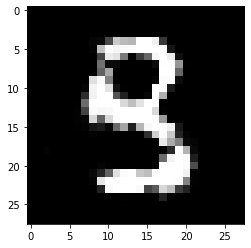

In [463]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
fake = simple_gan_mnist(noise)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_mnist[8] = fake[0, 0]

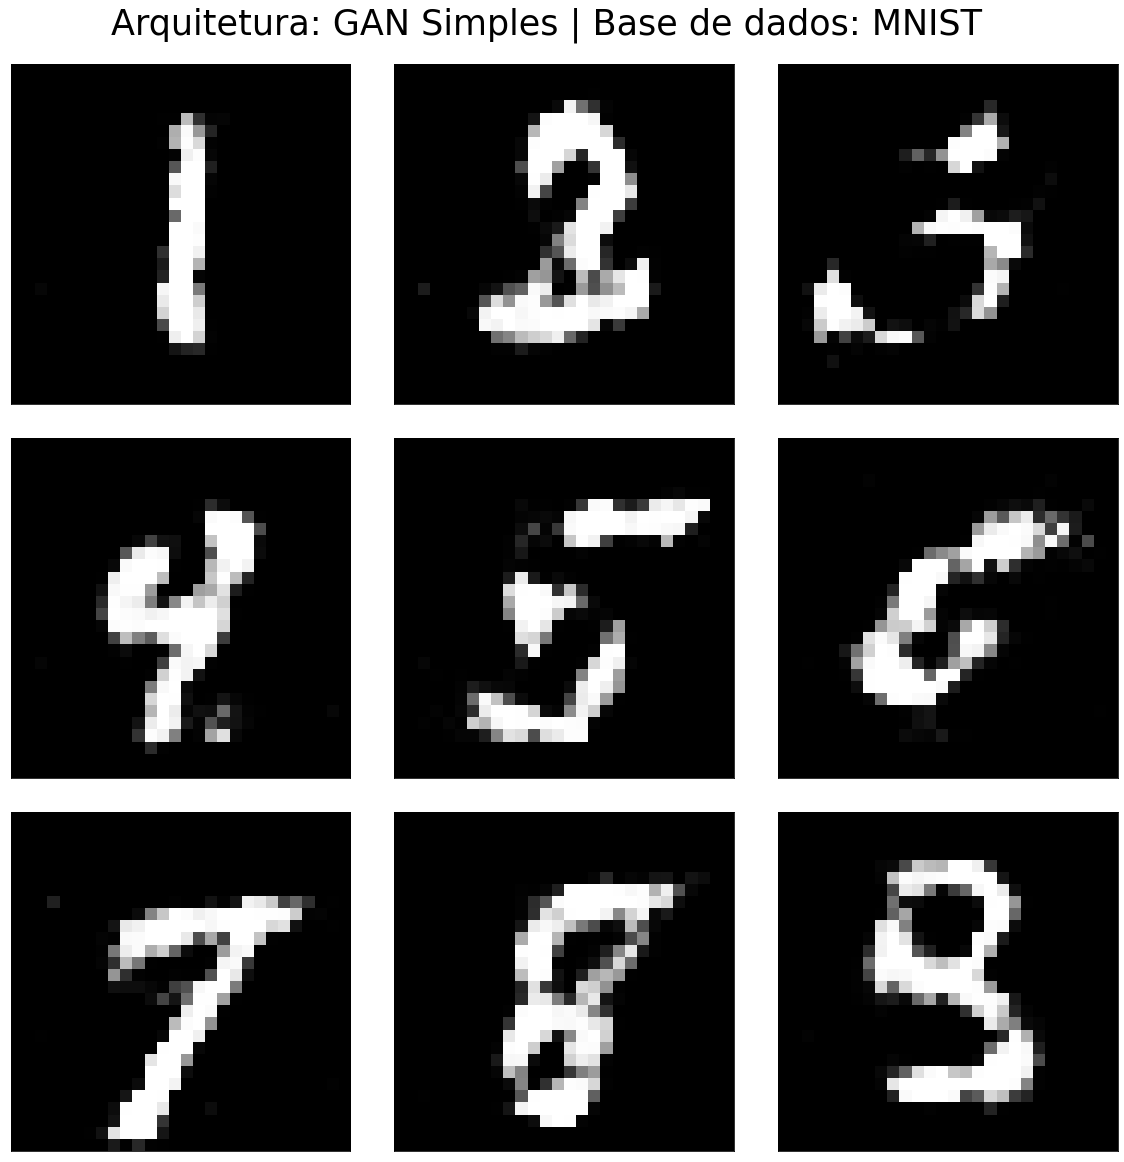

In [466]:
utils.grid_images(image_array = images_arrays_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: GAN Simples | Base de dados: MNIST',
                  name_fig = 'simple_gan_mnist')

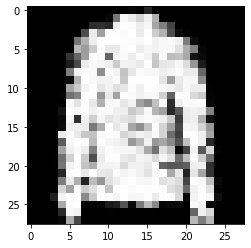

In [545]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
fake = simple_gan_fashion_mnist(noise)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_fashion_mnist[8] = fake[0, 0]

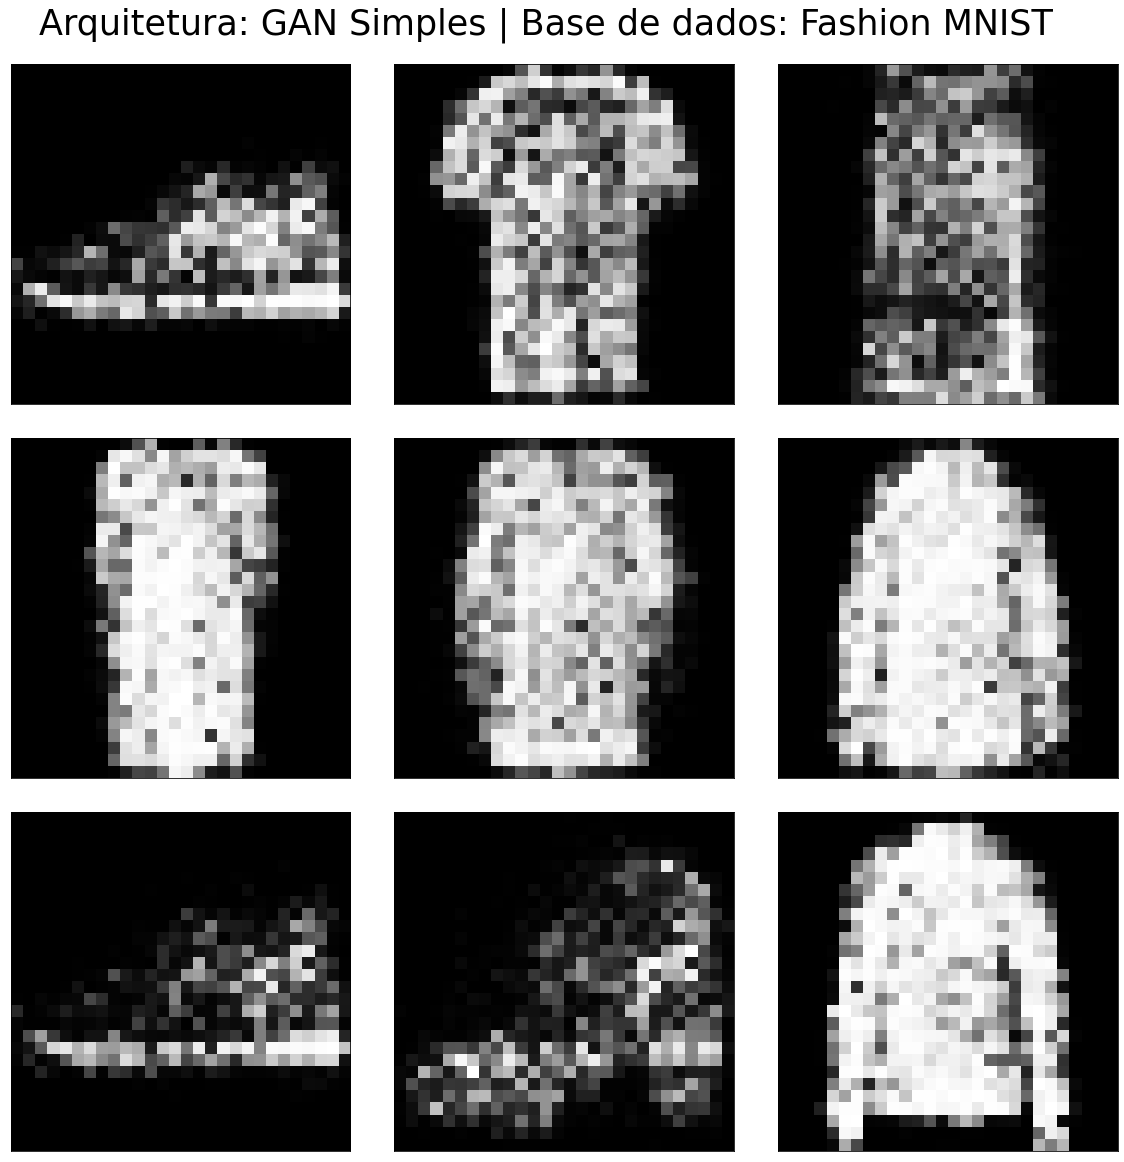

In [546]:
utils.grid_images(image_array = images_arrays_fashion_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: GAN Simples | Base de dados: Fashion MNIST',
                  name_fig = 'simple_gan_fashion_mnist')

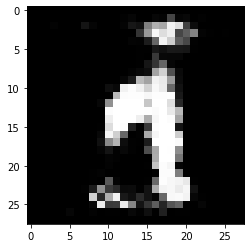

In [887]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
fake = simple_gan_emnist_letters(noise)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_emnist_letters[8] = fake[0, 0]

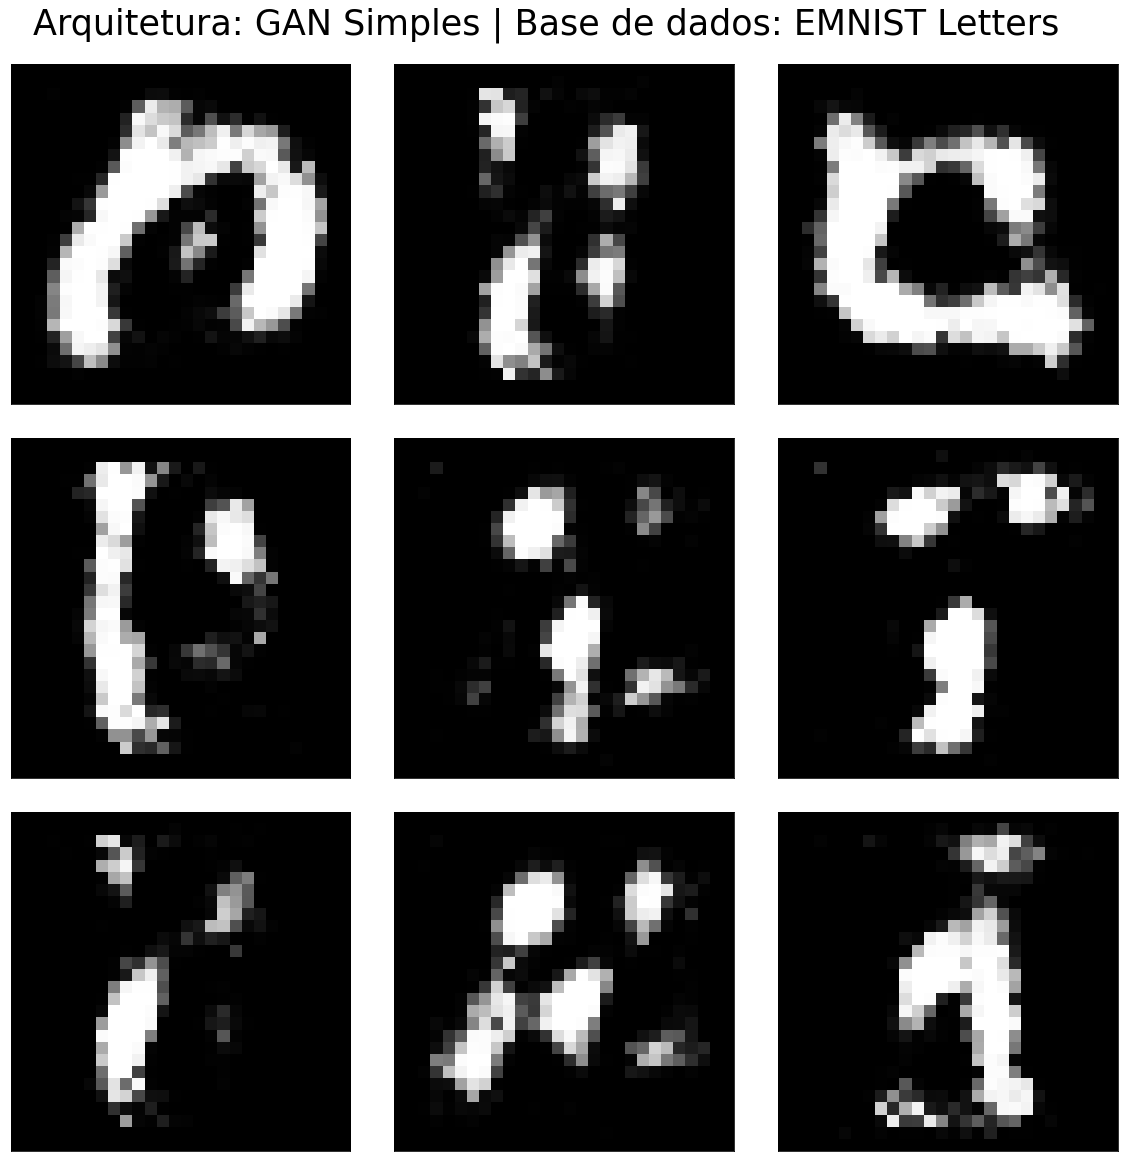

In [888]:
utils.grid_images(image_array = images_arrays_emnist_letters, cmap = 'gray', 
                  suptitle = 'Arquitetura: GAN Simples | Base de dados: EMNIST Letters',
                  name_fig = 'simple_gan_emnist_letters')

### DCGAN

### SNGAN

### WGAN-GP

### SWGAN